# Analysis of Dynamic Systems

## Schedule:

- Getting started
- Introduction
- Mathematical bases
- Bode diagrams
- Modeling with linear elements
- State variables
- Block diagrams
- Time response
- Frequency response
- Stability
- Root Locus
- Final project
- Course evaluation

In [1]:
# Run this only in Colab
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
colab_path = '/content/drive/My Drive/Colab Notebooks/dynamic-ud/notebooks/img/'
my_path = 'img/'
valid_path = colab_path # Use one of them depending on the platform

In [3]:
# Run this only in Colab
# Rendering SymPy equations in Colab requires the MathJax javascript library
from IPython.display import Math, HTML

def load_mathjax_in_cell_output():
  display(HTML("<script src='https://www.gstatic.com/external_hosted/"
               "mathjax/latest/MathJax.js?config=default'></script>"))
get_ipython().events.register('pre_run_cell', load_mathjax_in_cell_output)

## **Lab**: Find the transfer function representation and state variables of the following circuit (currents are the state variables and the output variables):

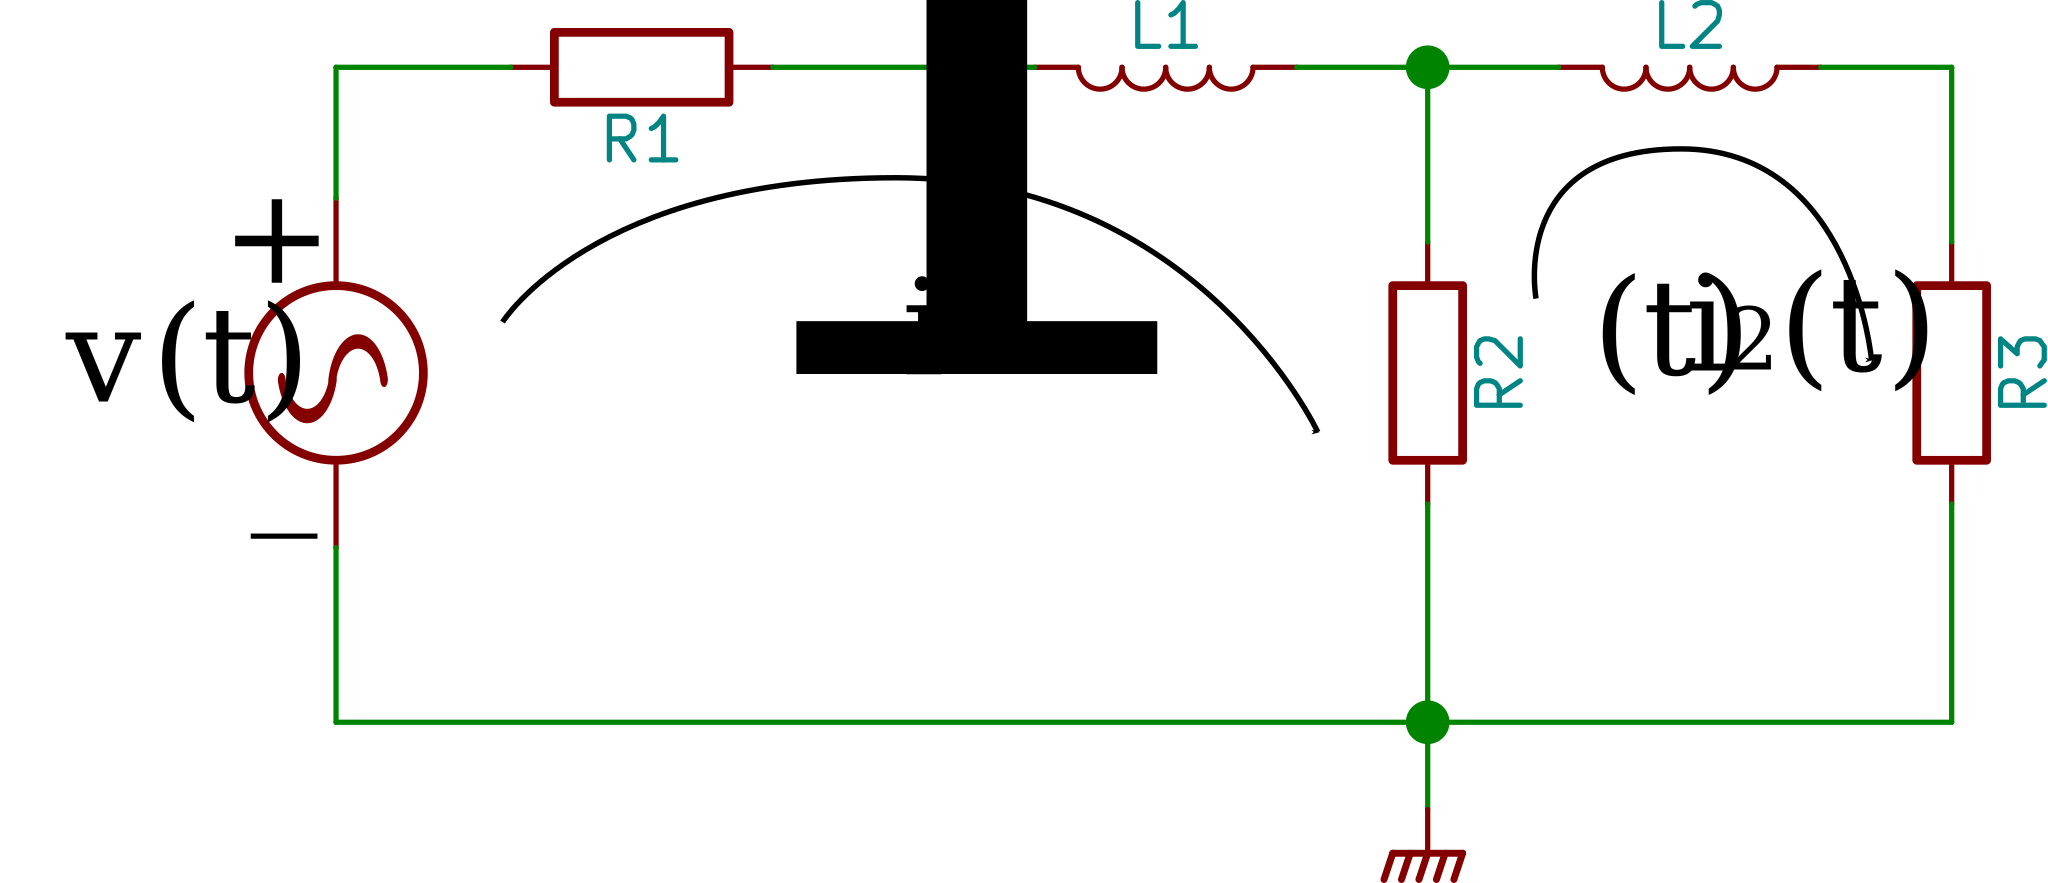

In [4]:
from IPython.display import SVG
SVG(valid_path + 'model_fig58.svg')

## Implementations with operational amplifiers

The linear analog dynamics of a system modeled with state variables (transfer function, block diagram or differential equation) can be emulated by operational amplifiers.

An equation with *n* state variables, i.e. of degree *n*, needs *n* integrators. The output of each integrator is assigned as a state variable.

### Example:

$$\left[\begin{array}{c}
\dot{x_{1}\left(t\right)}\\
\dot{x_{2}\left(t\right)}
\end{array}\right]=\left[\begin{array}{cc}
2 & -0.3\\
1 & -8
\end{array}\right]\left[\begin{array}{c}
x_{1}\left(t\right)\\
x_{2}\left(t\right)
\end{array}\right]+\left[\begin{array}{c}
-2\\
0
\end{array}\right]\mu\left(t\right)$$

$$y\left(t\right)=\left[\begin{array}{cc}
-2 & 3\end{array}\right]\left[\begin{array}{c}
x_{1}\left(t\right)\\
x_{2}\left(t\right)
\end{array}\right]$$

In this case *n* = 2, therefore we need two integrators.

The equations of this system are:

$$\dot{x_{1}\left(t\right)}=2x_{1}\left(t\right)-0.3x_{2}\left(t\right)-2\mu\left(t\right)$$

$$\dot{x_{2}\left(t\right)}=x_{1}\left(t\right)-8x_{2}\left(t\right)$$

$$y\left(t\right)=-2x_{1}\left(t\right)+3x_{2}\left(t\right)$$

The input is $\mu\left(t\right)$ and the output is $y\left(t\right)$, so we start by drawing these two variables.

In [5]:
SVG(valid_path + 'model_fig59.svg')

From the equations, it can be seen that $\dot{x_{1}\left(t\right)}$, $\dot{x_{2}\left(t\right)}$ and $y\left(t\right)$ are the result of additions!

Accordingly, I place to the left of each of these elements an adder.

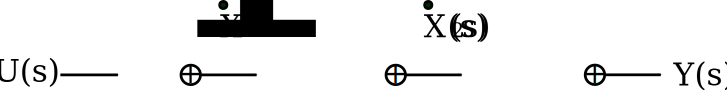

In [6]:
SVG(valid_path + 'model_fig60.svg')

To obtain the state variables just add integrators:

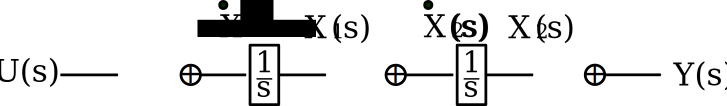

In [7]:
SVG(valid_path + 'model_fig61.svg')

Now we add what's needed to complete the first equation:

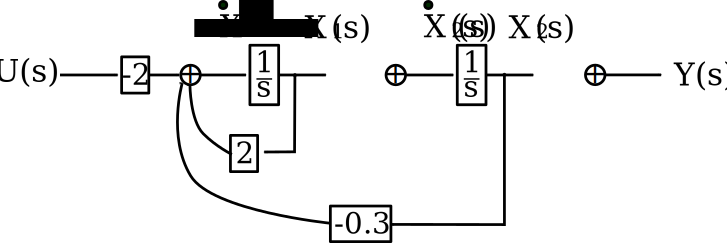

In [8]:
SVG(valid_path + 'model_fig62.svg')

In the same way we complete the second equation:

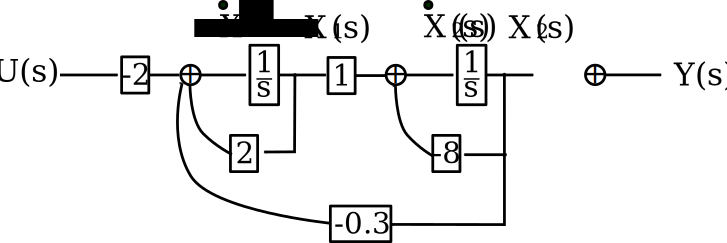

In [9]:
SVG(valid_path + 'model_fig63.svg')

And finally the output equation:

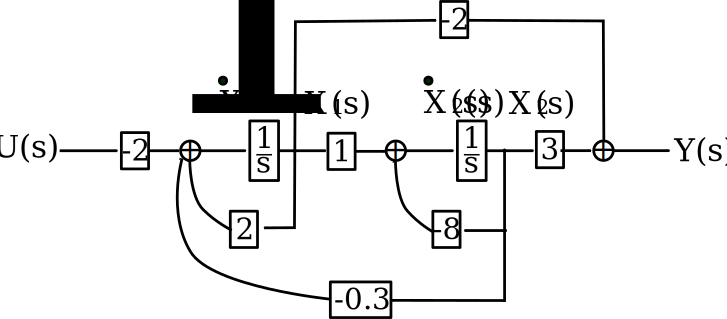

In [10]:
SVG(valid_path + 'model_fig64.svg')

### Example:

$$G\left(s\right)=\frac{b_{4}s^{3}+b_{3}s^{2}+b_{2}s+b_{1}}{s^{4}+a_{4}s^{3}+a_{3}s^{2}+a_{2}s+a_{1}}$$

In this case *n* = 4, therefore we need four integrators.

In phase-type state variables:

$$\left[\begin{array}{c}
\dot{x_{1}\left(t\right)}\\
\dot{x_{2}\left(t\right)}\\
\dot{x_{3}\left(t\right)}\\
\dot{x_{4}\left(t\right)}
\end{array}\right]=\left[\begin{array}{cccc}
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1\\
-a_{1} & -a_{2} & -a_{3} & -a_{4}
\end{array}\right]\left[\begin{array}{c}
x_{1}\left(t\right)\\
x_{2}\left(t\right)\\
x_{3}\left(t\right)\\
x_{4}\left(t\right)
\end{array}\right]+\left[\begin{array}{c}
0\\
0\\
0\\
1
\end{array}\right]\mu\left(t\right)$$

$$y\left(t\right)=\left[\begin{array}{cccc}
b_{1} & b_{2} & b_{3} & b_{4}\end{array}\right]\left[\begin{array}{c}
x_{1}\left(t\right)\\
x_{2}\left(t\right)\\
x_{3}\left(t\right)\\
x_{4}\left(t\right)
\end{array}\right]$$

The differential equations are:

$$\dot{x_{1}\left(t\right)}=x_{2}\left(t\right)$$

$$\dot{x_{2}\left(t\right)}=x_{3}\left(t\right)$$

$$\dot{x_{3}\left(t\right)}=x_{4}\left(t\right)$$

$$\dot{x_{4}\left(t\right)}=-a_{1}x_{1}\left(t\right)-a_{2}x_{2}\left(t\right)-a_{3}x_{3}\left(t\right)-a_{4}x_{4}\left(t\right)+\mu\left(t\right)
$$

$$y\left(t\right)=b_{1}x_{1}\left(t\right)+b_{2}x_{2}\left(t\right)+b_{3}x_{3}\left(t\right)+b_{4}x_{4}\left(t\right)$$

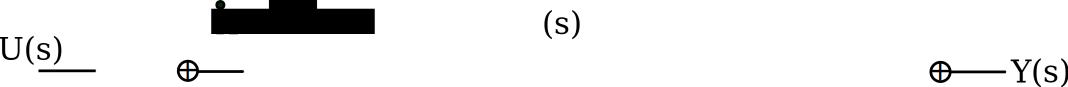

In [13]:
SVG(valid_path + 'model_fig65.svg')

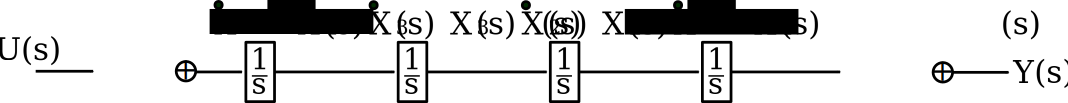

In [14]:
SVG(valid_path + 'model_fig66.svg')

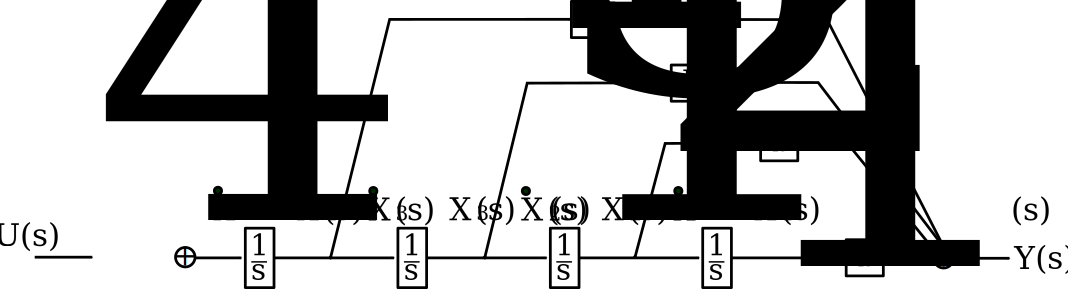

In [15]:
SVG(valid_path + 'model_fig67.svg')

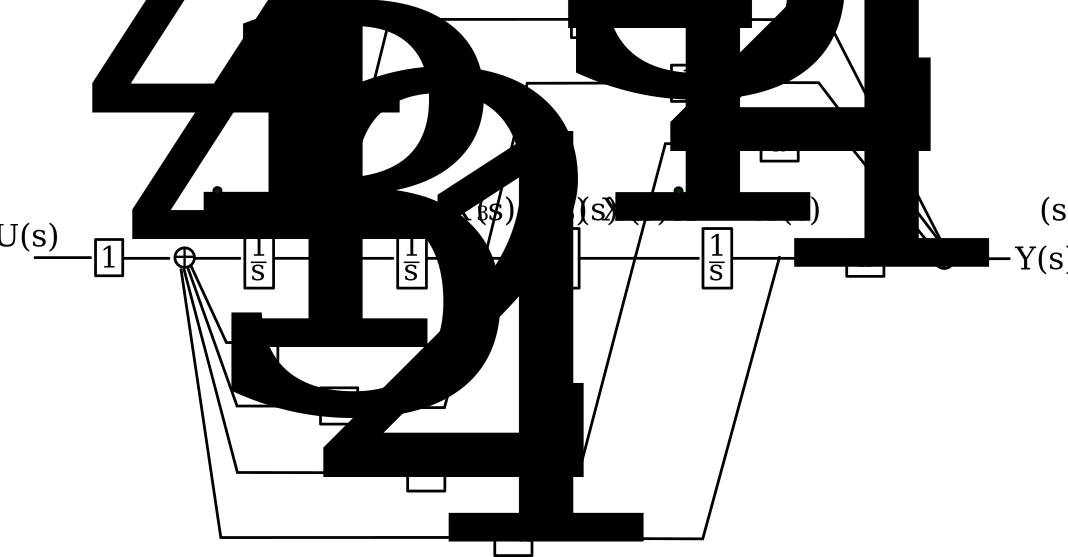

In [16]:
SVG(valid_path + 'model_fig68.svg')

As you know, each of these blocks can be implemented using operational amplifiers.

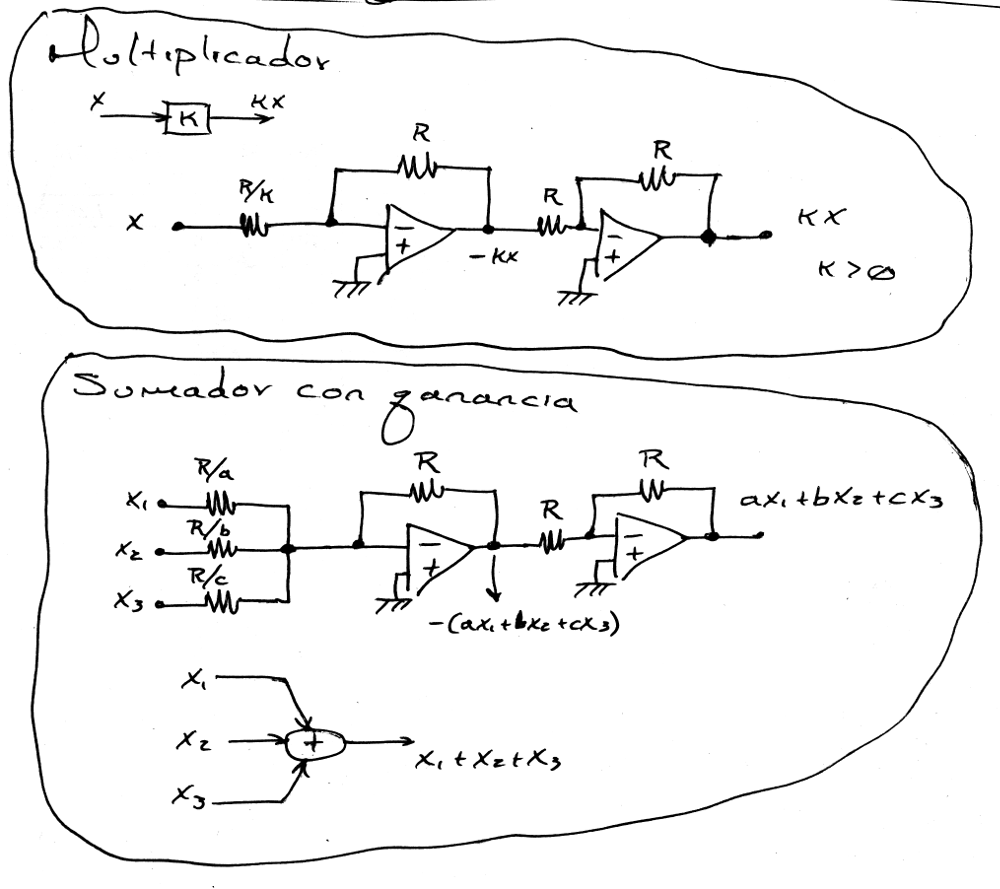

In [11]:
from IPython.display import Image
Image(filename=valid_path + 'model_fig70.png')

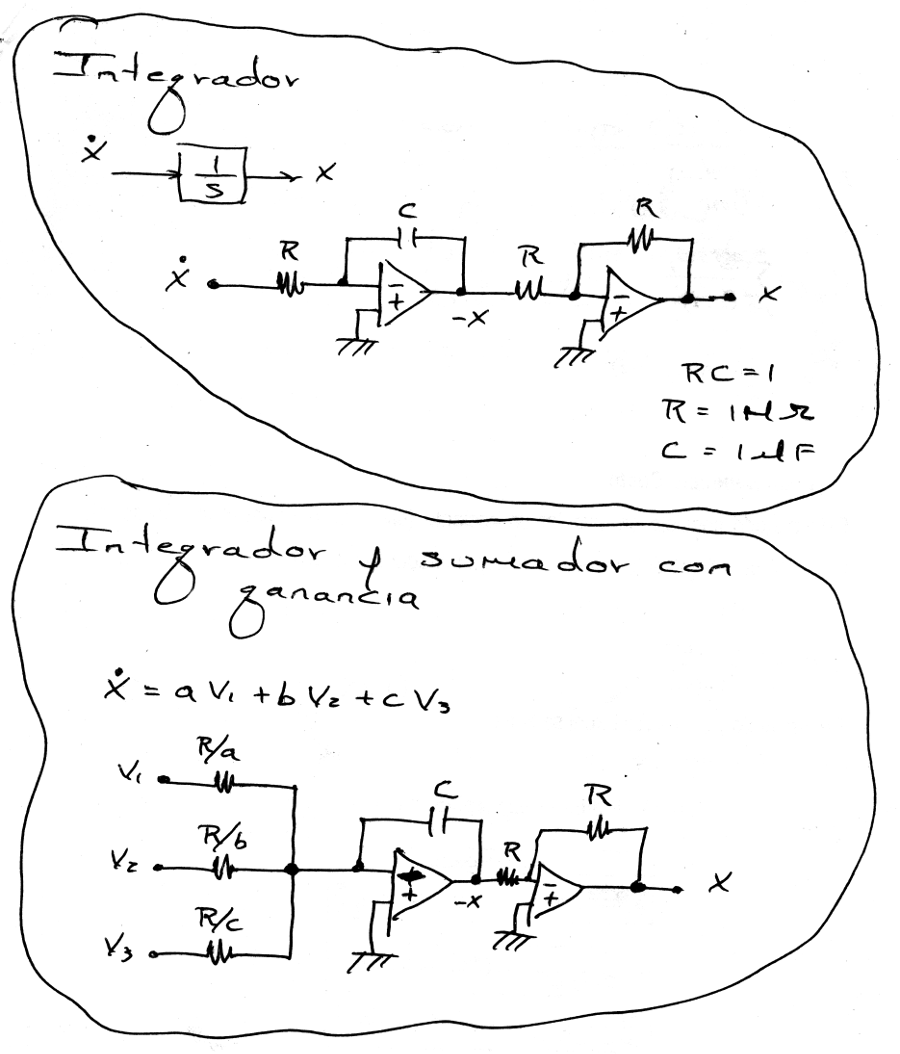

In [12]:
Image(filename=valid_path + 'model_fig71.png')